# SALES_PROJECT

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

Business Problems

For example:

How should we allocate our limited marketing budget for next year?
What type on influencers should we focus on?
Can we cut budget from TV, as it is too expensive?
Finally, set your assumptions of the marketing budget and influencer (if any). Can you try to predict the expected sales based on the best ML model?


Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


We can see there are mising data in several columns. Thus, we want to fill the missing data with its average, as follows:

In [5]:
df = df.fillna(df.mean()) # updates the df

# see the updated df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Now we have a dataframe that has no missing values. Now, we want to encode the categorical variable to dummy variables, as follows:

In [6]:
df = pd.get_dummies(df) # updates the df again

# see the updated df

df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [7]:
df.columns # getting the column names

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
df = df[['TV', 'radio', 'newspaper', 'sales']]

# see the updated df

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Out of curiosity, we just want to explore whether there is any correlation of Sales with its predictors:

In [11]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Now we have a clean data. Now, we will create the independent and dependent variables (x and y), as follows:

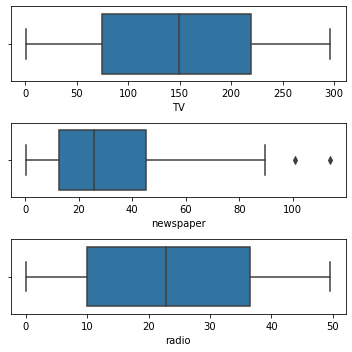

In [16]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

Exploratory Data Analysis

Univariate Analysis

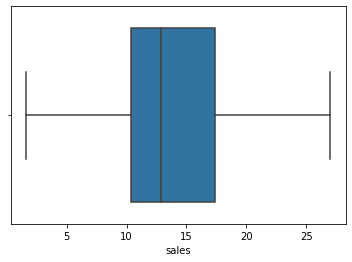

In [18]:
sns.boxplot(df['sales'])
plt.show()


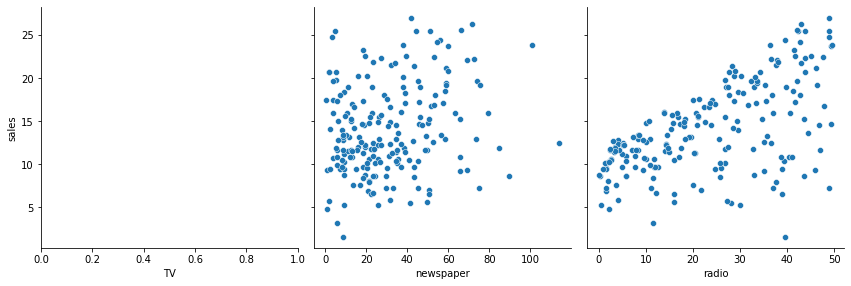

In [19]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

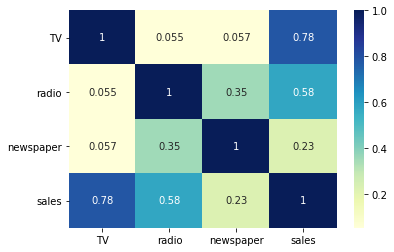

In [20]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [21]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1:].values

In [22]:
print(x)
print(y)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [24]:
print(x_train)
print(y_train)

[[ 25.6  39.    9.3]
 [217.7  33.5  59. ]
 [  8.6   2.1   1. ]
 [238.2  34.3   5.3]
 [135.2  41.7  45.9]
 [210.8  49.6  37.7]
 [255.4  26.9   5.5]
 [109.8  14.3  31.7]
 [218.5   5.4  27.4]
 [107.4  14.   10.9]
 [123.1  34.6  12.4]
 [239.3  15.5  27.3]
 [ 19.4  16.   22.3]
 [  0.7  39.6   8.7]
 [ 76.3  27.5  16. ]
 [129.4   5.7  31.3]
 [175.1  22.5  31.5]
 [ 25.1  25.7  43.3]
 [197.6   3.5   5.9]
 [110.7  40.6  63.2]
 [ 89.7   9.9  35.7]
 [222.4   4.3  49.8]
 [ 75.3  20.3  32.5]
 [134.3   4.9   9.3]
 [ 23.8  35.1  65.9]
 [168.4   7.1  12.8]
 [199.1  30.6  38.7]
 [ 53.5   2.   21.4]
 [218.4  27.7  53.4]
 [237.4  27.5  11. ]
 [273.7  28.9  59.7]
 [248.8  27.1  22.9]
 [166.8  42.    3.6]
 [227.2  15.8  49.9]
 [165.6  10.   17.6]
 [ 38.2   3.7  13.8]
 [ 66.1   5.8  24.2]
 [  8.4  27.2   2.1]
 [ 57.5  32.8  23.5]
 [216.4  41.7  39.6]
 [120.2  19.6  11.6]
 [172.5  18.1  30.7]
 [204.1  32.9  46. ]
 [222.4   3.4  13.1]
 [284.3  10.6   6.4]
 [ 70.6  16.   40.8]
 [240.1   7.3   8.7]
 [ 97.5   7.6

In [25]:
print(len(x_train),len(x_test))

150 50


Analysis

Now we will train and predict the data based on several regression models:

Linear

Random Forest

Decision Tree

Support Vector

Polynomial

For each regression model, we will evaluate its r2_score and root mean squared error (RMSE). The higher r2_score the better; the lower RMSE, the better.



Linear Regression

In [26]:
lr_regressor = LinearRegression() # instantiate the Linear Regression module
lr_regressor.fit(x_train, y_train) # training the data

# after training the data, perform prediction:

y_pred_lr = lr_regressor.predict(x_test) # this is the prediction 

# evaluate the r2_score and RMSE between prediction and real data

print(r2_score(y_test, y_pred_lr))
print(mse(y_test, y_pred_lr)**0.5)

0.8780333458947293
1.9018757577726995


In [27]:
print(lr_regressor.coef_, lr_regressor.intercept_)


[[0.04309974 0.19253857 0.00804775]] [3.04248487]


In [28]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

Linear Regression model shows that:

Sales = 3.50 TV + 0.14 Radio + 0.03 Social Media - 0.43 Macro + 0.13 Mega + 0.07 Micro + 0.22 Nano

Random Forest Regression

In [29]:
rf_regressor = RandomForestRegressor() # instantiate the Random Forest Regression module
rf_regressor.fit(x_train, y_train) # training the data

# after training the data, perform prediction:

y_pred_rf = rf_regressor.predict(x_test) # prediction data

# evaluate the r2_score and RMSE between prediction and real data

print(r2_score(y_test, y_pred_rf))
print(mse(y_test, y_pred_rf)**0.5)


0.9626136952955426
1.0529745106126713


Decision Tree Regression

In [30]:
# Similar processes with the above two examples

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

y_pred_dt = dt_regressor.predict(x_test)

print(r2_score(y_test, y_pred_dt))
print(mse(y_test, y_pred_dt)**0.5)

0.9598404732768191
1.0913294644606644


Support Vector Regression
For SVR, we need to perform feature scaling. In short, this is required because of some mathematical assumptions. So first we will perform feature scaling:



Feature Scaling for Support Vector Regression
To avoid confusion of variable names, we will create new independent and dependent variable names: a and b

In [31]:
a = df.iloc[:,0:-1].values
b = df.iloc[:,-1:].values

# reshape b

b = b.reshape(len(b), 1)

In [32]:
# now we split to train and test

a_train, a_test, b_train, b_test = train_test_split(a, b)

In [33]:
# now perform scaling

scala = StandardScaler()
scalb = StandardScaler()

a_train = scala.fit_transform(a_train)
b_train = scalb.fit_transform(b_train)

In [34]:
# training the SVR 

sv_regressor = SVR()
sv_regressor.fit(a_train, b_train)

SVR()

In [35]:
# create the prediction

b_pred = scalb.inverse_transform(sv_regressor.predict(scala.transform(a_test)))

In [36]:
# evaluate the model

print(r2_score(b_test, b_pred))
print(mse(b_test, b_pred)**0.5)

0.9736761588109035
0.7843544224687297


olynomial Regression
For Polynomial Regression, we also have to perform polynomial feature scaling.



In [37]:
poly = PolynomialFeatures()
po_regressor = LinearRegression()

# training the data

po_regressor.fit(poly.fit_transform(x_train), y_train)

LinearRegression()

In [38]:
# prediction training

y_pred_po = po_regressor.predict(poly.fit_transform(x_test))

# evaluate the model

print(r2_score(y_test, y_pred_po))
print(mse(y_test, y_pred_po)**0.5)

0.9861106751068139
0.6418036108526877


In [ ]:
from sklearn.model_selection import Gridsearch_Cv
Gridsearch_Cv()
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [ ]:
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

In [ ]:
print(best_grid.score(X_test, y_test))

Model Evaluation

Based on our analysis, it can be inferred that Support Vector Regression yields the highest R2 score and lowest RMSE. Thus, SVR will be the chosen model. We can use SVR model to predict the sales based on the input strategy.
Based on linear regression, we can infer that we can focus on TV, Radio, and Nano Influencer. We can cut budget related to other factors.


Concluding Remarks
I want this notebook to be as understandable as possible so students or people like me who are from math background can infer easily what is happening in each line of code.
I understand there will be several math/ML/any other assumptions that I might have skipped in this notebook (e.g. assumptions for Linear Regression, feature scaling, parameter tuning). Please let me know in the comments to improve it.
Overall, this is part of my learning journey as well as a business management scholar. So, I will just focus on the 'broad overview' of the algorithms, and shed a light more on making sense of how data can be used for better decision making
You can upvote if you like this notebook. Happy (machine) learning!

In [ ]:
from sklearn_model_selection import cross_val_score
scr=cross_val_score(LR,x,y,cv=5)
print("cross validation score:",scr.mean())

In [ ]:
from sklearn_model_selection import cross_val_score
scr=cross_val_score(dt,x,y,cv=5)
print("cross validation score Decision Tee:",scr.mean())

In [ ]:
from sklearn_model_selection import cross_val_score
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score Random Forest:",scr.mean())

In [ ]:
from sklearn_model_selection import GridSearchCv

In [ ]:
parameters={'n_estimetors'[200,700]:.
           'max_features':[]
            'max_depth':[] }

In [ ]:
GCV=GridSearchCv(RandomForestClassifier(),parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_parameters_

In [ ]:
mod=RandomForestClasifier(criterion='',)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(acccuracy_acore(y_test,pred)*100)

In [ ]:
import joblib
joblib.dump(mod,"sonarmodel.pkl")